In [20]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
directory_in_str = "./dataset"

In [40]:
file_names = []

directory = os.fsencode(directory_in_str)

for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".jpg"): 
         file_names.append(directory_in_str+"/"+filename)
         continue
     else:
         continue
            
file_names.sort()

In [41]:
histograms = []
for filename in file_names:
    img = cv2.imread(filename, cv2.IMREAD_COLOR)
    hist = cv2.calcHist([img],[0, 1, 2], None, [16,16,16], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    histograms.append(hist)

In [42]:
histograms[4].shape

(4096,)

In [43]:
def plot(index):
    plt.subplot(221)
    plt.imshow(cv2.imread(file_names[index], cv2.IMREAD_COLOR), 'gray')
    plt.subplot(222)
    plt.plot(histograms[index])
    plt.show()

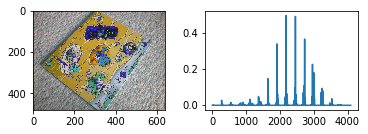

In [44]:
plot(3)

In [45]:
def search(index, top=10):
    hist_query = histograms[index]
    results = []
    for i in range(len(file_names)):
        hist = histograms[i]
        res = cv2.compareHist(hist_query, hist, cv2.HISTCMP_CORREL)
        results.append(res)
    results_indexes = np.argsort(results)
    itself = results_indexes == index
    results_indexes = results_indexes[~itself]
    return results_indexes[::-1][0:top]

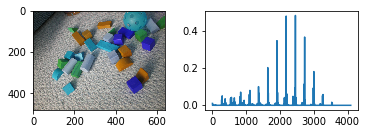

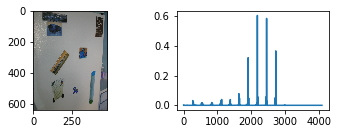

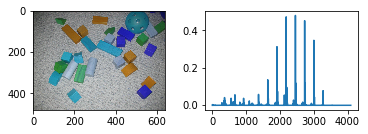

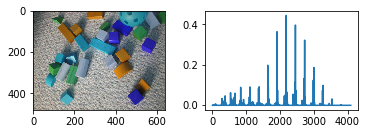

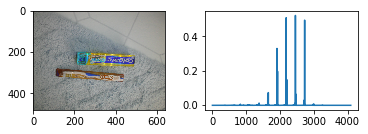

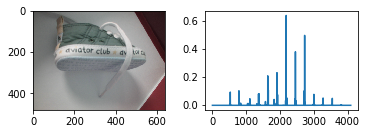

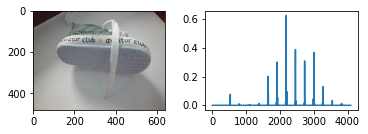

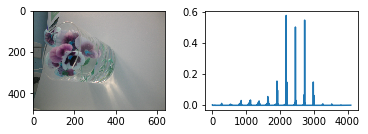

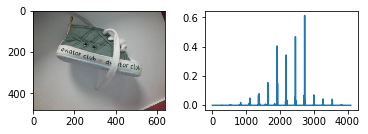

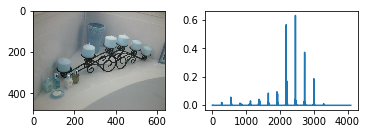

In [46]:
results = search(3)
for res in results: 
    plot(res)

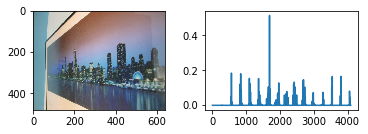

In [47]:
plot(39)

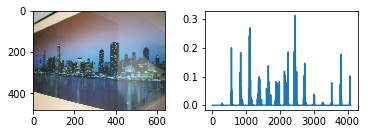

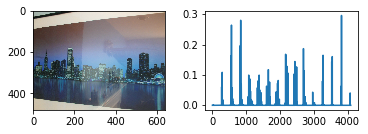

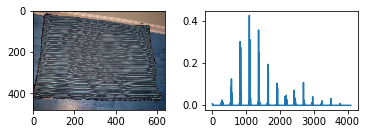

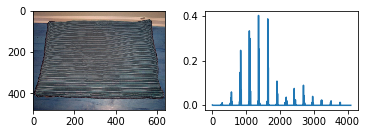

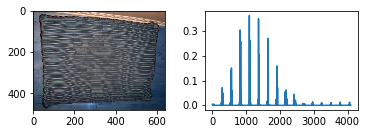

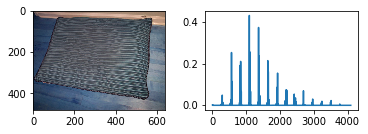

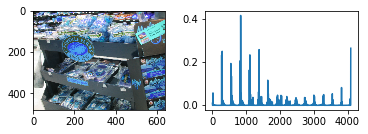

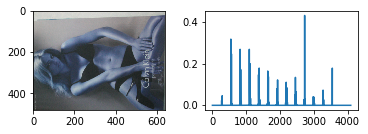

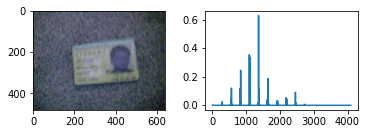

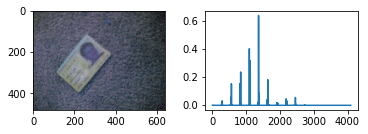

In [49]:
results = search(39)
for res in results: 
    plot(res)

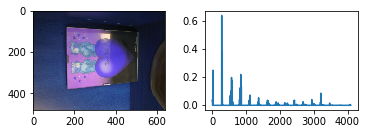

In [51]:
plot(59)

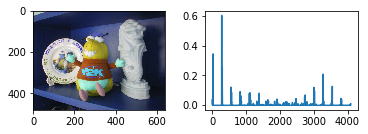

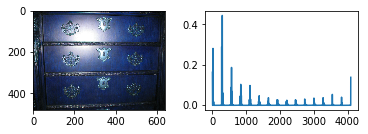

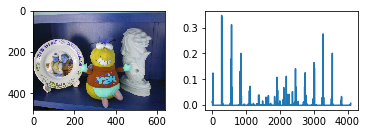

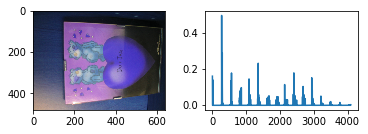

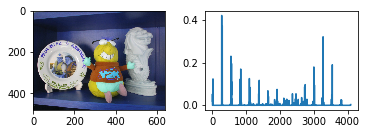

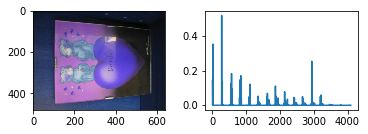

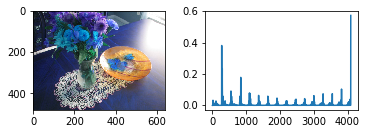

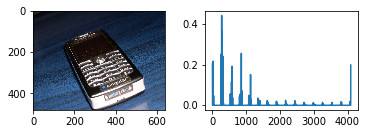

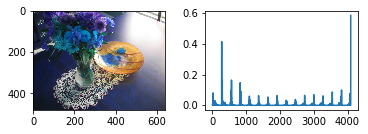

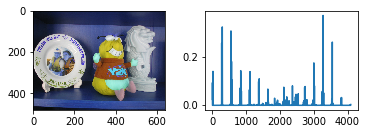

In [52]:
results = search(59)
for res in results: 
    plot(res)

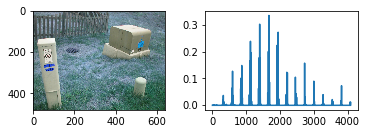

In [53]:
plot(587)

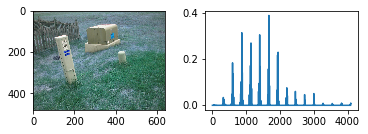

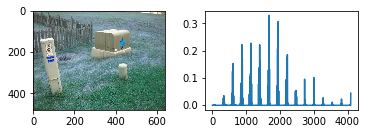

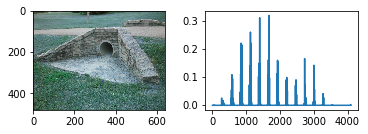

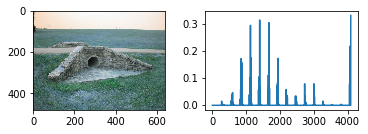

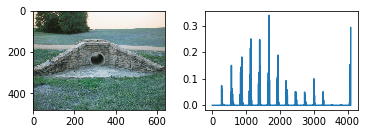

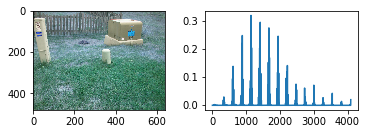

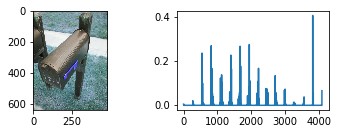

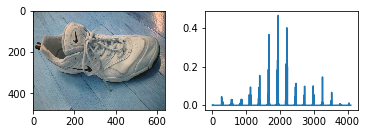

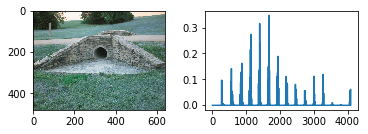

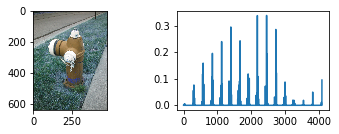

In [54]:
results = search(587)
for res in results: 
    plot(res)

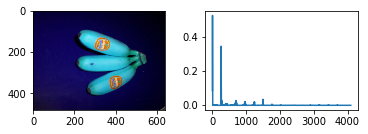

In [55]:
plot(1561)

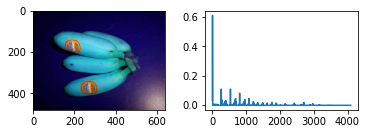

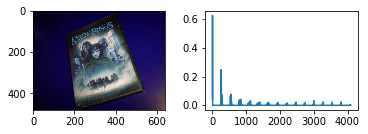

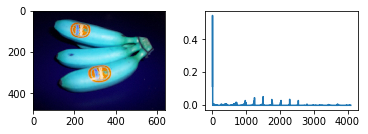

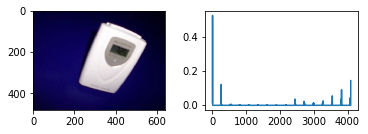

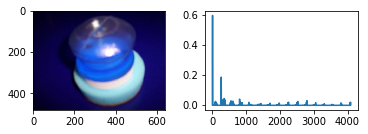

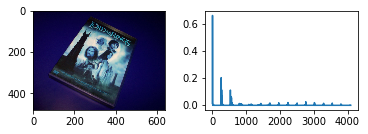

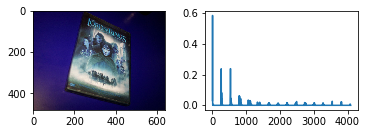

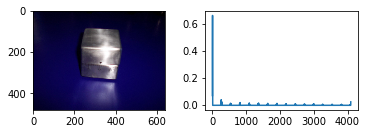

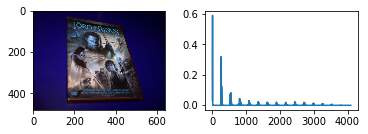

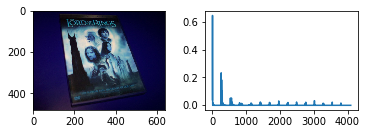

In [56]:
results = search(1561)
for res in results: 
    plot(res)